In [1]:
!unzip /content/dataset.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd

In [3]:
imbalance_data = pd.read_csv(r"C:\Users\rithi\OneDrive\Desktop\END-TO-END-NLP-PROJECT\artifacts\09_01_2025_19_02_04\DataIngestionArtifacts\imbalanced_data.csv")

In [4]:
imbalance_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## EDA

In [5]:
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

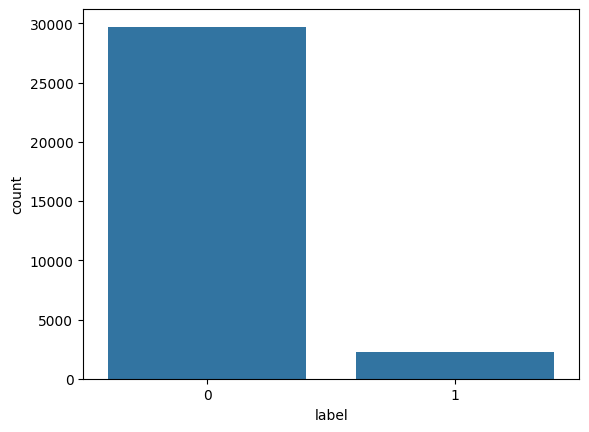

In [6]:
sns.countplot(x='label', data=imbalance_data)

 - 0 ---> No hate
 - 1 ---> Hate

In [7]:
imbalance_data.shape

(31962, 3)

In [8]:
imbalance_data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [9]:
imbalance_data.drop("id", axis=1, inplace=True)

In [10]:
imbalance_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [11]:
raw_data = pd.read_csv(r"C:\Users\rithi\OneDrive\Desktop\END-TO-END-NLP-PROJECT\artifacts\09_01_2025_19_02_04\DataIngestionArtifacts\raw_data.csv")

In [12]:
raw_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [13]:
raw_data.shape

(24783, 7)

In [14]:
raw_data.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [15]:
# Let's drop the columns which are not required for us.
raw_data.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace =True)

In [16]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [17]:
# Let's check for the unique values in the dataset
raw_data['class'].unique()

array([2, 1, 0], dtype=int64)

<Axes: xlabel='class', ylabel='count'>

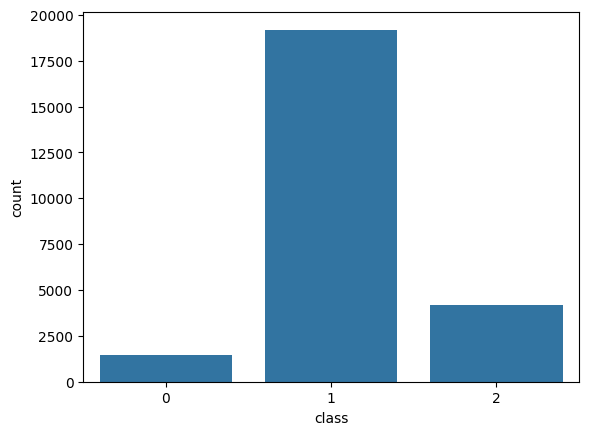

In [18]:
# Plotting the countplot for our new dataset
sns.countplot(x='class',data =raw_data)

- class 0: hate
- class 1: abusive
- class 2: no hate

In [19]:
# Let's copy the valus of the class 1 into class 0.
raw_data[raw_data['class']==0]['class']=1

C:\Users\rithi\AppData\Local\Temp\ipykernel_4568\3749826095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data[raw_data['class']==0]['class']=1


In [20]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [21]:
raw_data['class'].unique()

array([2, 1, 0], dtype=int64)

In [22]:
# Let's check the values in the class 0
raw_data[raw_data['class']==0]

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...
24576,0,this guy is the biggest faggot omfg
24685,0,which one of these names is more offensive kik...
24751,0,you a pussy ass nigga and I know it nigga.
24776,0,you're all niggers


In [23]:
# replace the value of 0 to 1
raw_data["class"].replace({0:1},inplace=True)

C:\Users\rithi\AppData\Local\Temp\ipykernel_4568\376421553.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data["class"].replace({0:1},inplace=True)


In [24]:
raw_data["class"].unique()

array([2, 1], dtype=int64)

<Axes: xlabel='class', ylabel='count'>

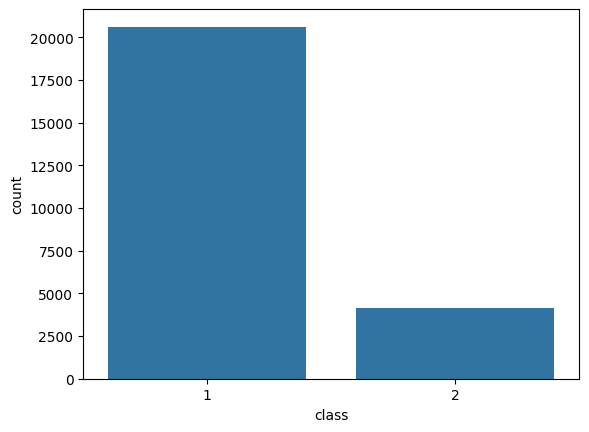

In [25]:
sns.countplot(x="class",data= raw_data)

In [26]:
# Let's replace the value of 2 to 0.
raw_data["class"].replace({2:0}, inplace = True)

C:\Users\rithi\AppData\Local\Temp\ipykernel_4568\385002427.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data["class"].replace({2:0}, inplace = True)


<Axes: xlabel='class', ylabel='count'>

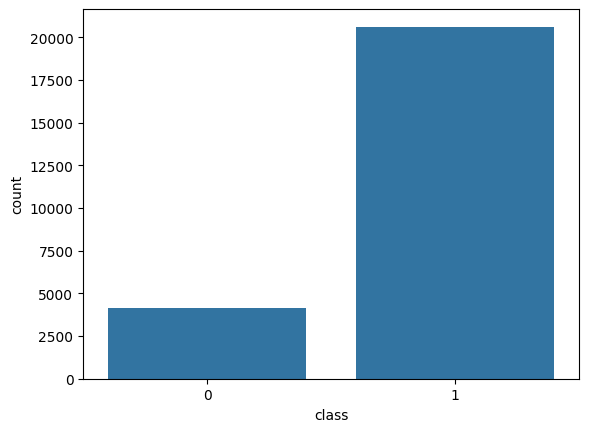

In [27]:
sns.countplot(x='class',data=raw_data)

In [28]:
imbalance_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [29]:
raw_data.head()

,class,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [30]:
# Let's change the name of the 'class' to label
raw_data.rename(columns={'class':'label'},inplace =True)

In [31]:
raw_data.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [54]:
# Let's concatinate both the data into a single data frame.
frame = [imbalance_data, raw_data]
df = pd.concat(frame)

In [55]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [56]:
df.shape

(56745, 2)

<Axes: xlabel='label', ylabel='count'>

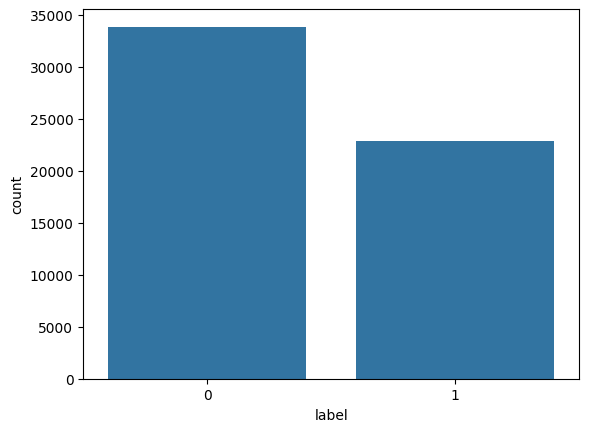

In [57]:
sns.countplot(x='label',data=df)

## Preprocessing

In [36]:
import re
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rithi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
# Let's apply stemming and stopwords on the data
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

In [58]:
# Let's apply regex and do cleaning.
def data_cleaning(text):
    
    text = str(text).lower()

    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)

    tokens = [stemmer.stem(word) for word in text.split() if word not in stopword]

    return " ".join(tokens)

In [59]:
df["tweet"][1]

1    @user @user thanks for #lyft credit i can't us...
1    !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
Name: tweet, dtype: object

In [60]:
# let's apply the data_cleaning on the data.
df['tweet']=df['tweet'].apply(data_cleaning)

In [61]:
df["tweet"][1]

1    user user thank lyft credit cant use caus dont...
1     rt boy dat coldtyga dwn bad cuffin dat hoe place
Name: tweet, dtype: object

In [62]:
df['tweet'].isnull().sum()

0

In [63]:
dd=df["tweet"].str.split().str.len()
dd.min()

0

In [64]:
dd.max()

29

In [65]:
idx_max = dd.idxmax()
print("Index of max word count:", idx_max)
print("Tweet:", df.loc[idx_max, "tweet"])


Index of max word count: 16602
Tweet: 16602          user wowmtn u best father day best everð
16602    rt nandagorg rt like bmth adtr ptv ymas sws at...
Name: tweet, dtype: object


In [66]:
x = df['tweet']
y = df['label']

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
# Let's split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42)

print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

42558 42558
14187 14187


## Feature engineering

In [69]:
import tensorflow as tf

text_vectorizer = tf.keras.layers.TextVectorization(
                max_tokens=50000,
                output_sequence_length=30,
                standardize='lower_and_strip_punctuation',
                split='whitespace',
                output_mode='int'
            )

In [70]:
text_vectorizer.adapt(x_train)

In [71]:
text_vectorizer.get_vocabulary()[90:100]

['much',
 'stop',
 'great',
 'white',
 'home',
 'use',
 'follow',
 'summer',
 'real',
 'night']

In [72]:
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding,SpatialDropout1D
from hate.constants import *

model = Sequential()
model.add(tf.keras.Input(shape=(1,), dtype=tf.string)) 
model.add(text_vectorizer)
model.add(Embedding(MAX_WORDS, 100,input_length=MAX_LEN))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation=ACTIVATION))
model.summary()
model.compile(loss=LOSS,optimizer=RMSprop(),metrics=METRICS)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 30)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 30, 100)           5000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 30, 100)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5080501 (19.38 MB)
Trainable params: 50805

In [74]:
history = model.fit(x_train,y_train,batch_size=128,epochs = 2,validation_split=0.2)

Epoch 1/2
266/266 [==============================] - 19s 72ms/step - loss: 0.1775 - accuracy: 0.9384 - val_loss: 0.1650 - val_accuracy: 0.9441
Epoch 2/2
266/266 [==============================] - 18s 69ms/step - loss: 0.1410 - accuracy: 0.9537 - val_loss: 0.1703 - val_accuracy: 0.9384


In [75]:
accr = model.evaluate(x_test,y_test)

444/444 [==============================] - 3s 7ms/step - loss: 0.1787 - accuracy: 0.9323


In [76]:
lstm_prediction = model.predict(x_test)

444/444 [==============================] - 4s 7ms/step


In [77]:
res = []
for prediction in lstm_prediction:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)

In [78]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,res))

[[7934  519]
 [ 441 5293]]


In [ ]:
type(x_train)

pandas.core.series.Series